## **Import Libraries**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from feature_extraction import preprocessing, extract_features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

## **Load Dataset**

In [3]:
directory = './dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images'
leaf_class_names=[]
for file in os.listdir(directory):
    leaf_class_names+=[file]
print(leaf_class_names)

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']


## **Feature Extraction**

In [3]:
data = [] # X
labels = [] # y
label_names = []
num_classes = 0
features = []

for file in os.listdir(directory):
    print(f'Extracting features of {file}')
    path = os.path.join(directory,file)
    class_images = os.listdir(path)
    for img in class_images:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (800, 800))
        img = preprocessing(img)
        data.append(img)
        labels.append(num_classes)
        label_names.append(file)
        features.append(extract_features(img, num_classes))
    num_classes += 1

Extracting features of Alpinia Galanga (Rasna)
Extracting features of Amaranthus Viridis (Arive-Dantu)
Extracting features of Artocarpus Heterophyllus (Jackfruit)
Extracting features of Azadirachta Indica (Neem)
Extracting features of Basella Alba (Basale)
Extracting features of Brassica Juncea (Indian Mustard)
Extracting features of Carissa Carandas (Karanda)
Extracting features of Citrus Limon (Lemon)
Extracting features of Ficus Auriculata (Roxburgh fig)
Extracting features of Ficus Religiosa (Peepal Tree)
Extracting features of Hibiscus Rosa-sinensis
Extracting features of Jasminum (Jasmine)
Extracting features of Mangifera Indica (Mango)
Extracting features of Mentha (Mint)
Extracting features of Moringa Oleifera (Drumstick)
Extracting features of Muntingia Calabura (Jamaica Cherry-Gasagase)
Extracting features of Murraya Koenigii (Curry)
Extracting features of Nerium Oleander (Oleander)
Extracting features of Nyctanthes Arbor-tristis (Parijata)
Extracting features of Ocimum Tenui

#### Extract features from test image

In [ ]:
img = cv2.imread('./dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Hibiscus Rosa-sinensis/HR-S-001.jpg')

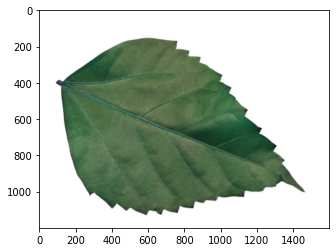

In [5]:
# RGB Image
plt.imshow(img)

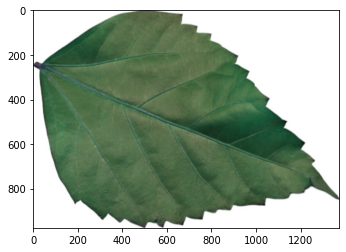

In [6]:
# Cropped Image
cropped_img = cv2.imread('../cropped_leaf.jpg')
plt.imshow(cropped_img)

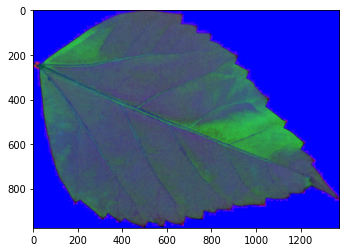

In [7]:
# HSV Image
hsv_img = cv2.imread('../hsv_leaf.jpg')
plt.imshow(hsv_img)

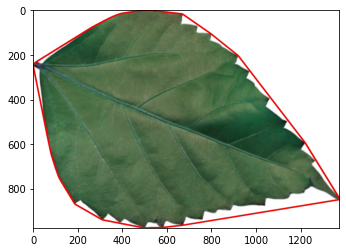

In [8]:
# Convex Hull
convex_hull = cv2.imread('../convex_hull.jpg')
plt.imshow(convex_hull)

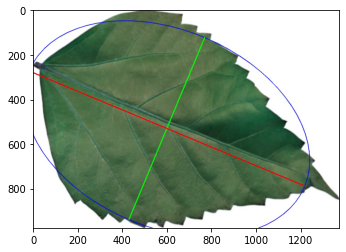

In [9]:
# Major and Minor Axis
axes = cv2.imread('../axes.jpg')
plt.imshow(axes)

#### Export Features

In [10]:
feature_names = ['r_mean', 'r_std', 'r_skew', 'r_kurtosis', 'g_mean', 'g_std', 'g_skew', 'g_kurtosis', 'b_mean', 'b_std', 'b_skew', 'b_kurtosis',
                 'h_mean', 'h_std', 'h_skew', 'h_kurtosis', 's_mean', 's_std', 's_skew', 's_kurtosis', 'v_mean', 'v_std', 'v_skew', 'v_kurtosis',
                 'major_axis', 'minor_axis', 'aspect_ratio', 'convex_hull_area', 'convex_hull_perimeter', 'convex_hull_ratio',      
                 'contrast_g', 'dissimilarity_g', 'homogeneity_g', 'energy_g', 'correlation_g',
                 'contrast_h', 'dissimilarity_h', 'homogeneity_h', 'energy_h', 'correlation_h',
                 'contrast_s', 'dissimilarity_s', 'homogeneity_s', 'energy_s', 'correlation_s','label']

In [11]:
# Combine all the feature values into a single dataframe
df = pd.DataFrame(features, columns=feature_names)

In [12]:
df.head()

,r_mean,r_std,r_skew,r_kurtosis,g_mean,g_std,g_skew,g_kurtosis,b_mean,b_std,...,dissimilarity_h,homogeneity_h,energy_h,correlation_h,contrast_s,dissimilarity_s,homogeneity_s,energy_s,correlation_s,label
0,208.561388,84.669063,-1.301768,-0.260953,215.176396,72.566856,-1.294471,-0.289839,209.785406,82.467732,...,1.414524,0.866959,0.745218,0.917067,26.845161,1.732654,0.791687,0.744421,0.991678,0.0
1,169.986225,97.899189,-0.301962,-1.881093,195.401118,69.094511,-0.336655,-1.814123,184.126202,82.121281,...,1.102279,0.881639,0.552109,0.919545,29.128497,2.119205,0.653698,0.545958,0.996586,0.0
2,203.772195,89.205921,-1.188858,-0.551127,216.775838,66.646399,-1.194598,-0.525059,209.228572,79.839667,...,0.966966,0.916556,0.733733,0.922317,30.073867,1.685182,0.785018,0.731895,0.995689,0.0
3,146.523113,98.512199,0.162751,-1.925419,173.264712,74.417092,0.150106,-1.909575,158.925887,87.467819,...,1.378605,0.834209,0.437152,0.915500,36.746892,2.779166,0.559584,0.422750,0.995107,0.0
4,226.581564,70.706921,-2.118279,2.546200,233.654348,53.123568,-2.116497,2.542162,229.855778,62.608595,...,0.920419,0.933249,0.842461,0.887084,27.302479,1.366504,0.867581,0.842033,0.993508,0.0


In [13]:
df.to_csv('leaf_features.csv', index=False)

## **ML Models**

#### Load CSV

In [61]:
# Load the feature data from the CSV file
df = pd.read_csv('leaf_features.csv')

#### Split into train and test sets

In [62]:
# Split the data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [63]:
# Normalise the features
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
# Save the scaler
with open('./models/scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Support Vector Machine

#### Linear SVM

In [41]:
# Use Grid Search for optimum hyperparameter values
# Define the pipeline with StandardScaler and LinearSVC
pipeline = Pipeline([
    ('clf', SVC(kernel='linear'))
])

# Define the range of hyperparameters to search over
param_grid = {
    'clf__C': [1, 10, 50, 100, 250, 500]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

Best hyperparameters: {'clf__C': 100}
Accuracy: 0.9120545146386199


In [66]:
# Train an SVM model on the training set
linear_clf = SVC(kernel='linear', C=10, random_state=42)
linear_clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_linear = linear_clf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred_linear)
print(f'SVM(kernel=linear) Accuracy: {accuracy}')

SVM(kernel=linear) Accuracy: 0.9239130434782609


#### Polynomial SVM (Best Performing)

In [43]:
# Use Grid Search for optimum hyperparameter values
# instantiate the model
svm = SVC(kernel='poly')

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [1, 2, 3, 4, 5, 6],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'degree': 3, 'gamma': 1}
Best Score: 0.9032038173142468


In [67]:
poly_clf = SVC(kernel='poly', degree=5, gamma=1)

# fit the model to the training data
poly_clf.fit(X_train, y_train)

# predict the target values for the test data
y_pred = poly_clf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM(kernel=poly) Accuracy:", accuracy)

SVM(kernel=poly) Accuracy: 0.9483695652173914


In [68]:
# Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.86      0.90      0.88        21
         2.0       0.92      0.92      0.92        12
         3.0       0.93      1.00      0.96        13
         4.0       1.00      0.96      0.98        27
         5.0       0.90      1.00      0.95         9
         6.0       0.94      1.00      0.97        16
         7.0       0.92      0.79      0.85        14
         8.0       0.90      1.00      0.95         9
         9.0       1.00      1.00      1.00         8
        10.0       0.91      0.77      0.83        13
        11.0       1.00      1.00      1.00        11
        12.0       1.00      0.80      0.89        10
        13.0       1.00      1.00      1.00        16
        14.0       1.00      1.00      1.00        14
        15.0       0.75      1.00      0.86         6
        16.0       1.00      1.00      1.00        10
        17.0       0.93    

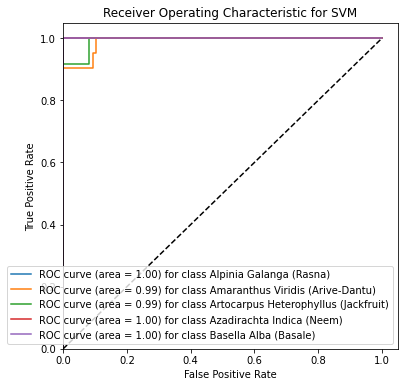

In [70]:
# Get predicted probabilities of test data
y_score = poly_clf.decision_function(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(6,6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], leaf_class_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the Model
with open('./models/svm_poly.pkl', 'wb') as file:
    pickle.dump(poly_clf, file)

#### Radial Basis Function (RBF) SVM

In [27]:
# Use Grid Search for optimum hyperparameter values
# instantiate the model
rbf_clf = SVC(kernel='rbf')

# Define the hyperparameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search
grid = GridSearchCV(rbf_clf, param_grid, cv=5)
grid.fit(X, y)

# Print the best hyperparameters from grid search
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 1}
Best score:  0.903487142835872


In [72]:
rbf_clf = SVC(kernel='rbf', gamma=1, C=10)

# fit the model to the training data
rbf_clf.fit(X_train, y_train)

# predict the target values for the test data
y_pred = rbf_clf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('SVM(kernel=rbf) Accuracy:', accuracy)

SVM(kernel=rbf) Accuracy: 0.9456521739130435


### Decision Trees

In [29]:
# Use Grid Search for optimum hyperparameter values
# instantiate the model
dt = DecisionTreeClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

# Perform grid search
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters from grid search
print("Best hyperparameters from Grid Search: ", grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

Best hyperparameters from Grid Search:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}
Accuracy: 0.742320819112628


In [76]:
dt = DecisionTreeClassifier(criterion='entropy', 
                           max_depth=10,
                           max_features=None,
                           min_samples_leaf=2,
                           min_samples_split=2,
                           random_state=42)

# fit the model to the training data
dt.fit(X_train, y_train)

# predict the target values for the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred_dt)
print('DT Accuracy:', accuracy)

DT Accuracy: 0.717391304347826


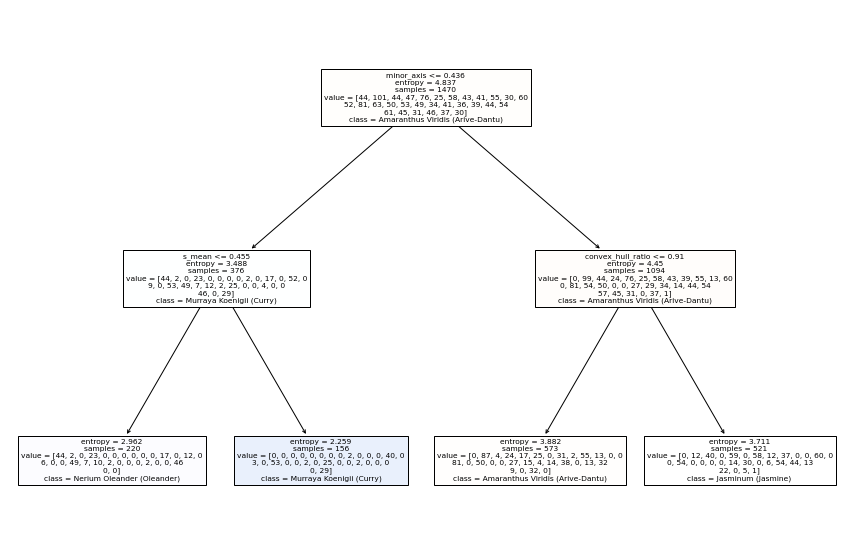

In [75]:
# Plot Tree
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, class_names=leaf_class_names, feature_names=feature_names)
plt.show()

### Random Forests

In [77]:
rf = RandomForestClassifier(
    n_estimators=200, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt', 
    max_depth=None,
    bootstrap=False
)

# fit the model to the training data
rf.fit(X_train, y_train)

# predict the target values for the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred_rf)
print('RF Accuracy:', accuracy)

RF Accuracy: 0.9266304347826086


### XGBoost

In [78]:
xgb_clf = xgb.XGBClassifier()

# fit the model to the training data
xgb_clf.fit(X_train, y_train)

# predict the target values for the test data
y_pred = xgb_clf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('XGBoost Accuracy: ', accuracy)

XGBoost Accuracy:  0.8831521739130435


### k-Nearest Neighbors

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

# predict the target values for the test data
y_pred = knn.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.8695652173913043


## **Real-time**

In [ ]:
# Load the Scaler
with open('./models/scaler_30_leaves.pkl', 'rb') as file:
    sc = pickle.load(file)

In [ ]:
# Load the SVM Polynomial Model
with open('./models/svm_poly_deg2_model_30_leaves.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
test_img = cv2.imread('./dataset/test_images/neem1.jpg')
test_img = cv2.resize(test_img, (800,800))
img = preprocessing(test_img)

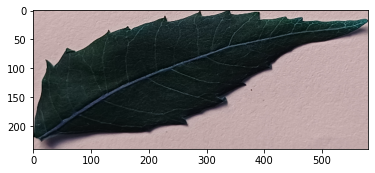

In [83]:
plt.imshow(img)

In [89]:
feature = extract_features(img)
feature = feature.reshape(1,-1)
y_test_img = sc.transform(feature)

In [91]:
pred = model.predict(y_test_img)
print('Predicted Class: ', leaf_class_names[int(pred[0])])

Predicted Class:  Azadirachta Indica (Neem)


## **DL Models**

#### Import Libraries

In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.applications import VGG16, InceptionV3

#### Pre-processing

In [4]:
# Load the medicinal plant dataset
data = []
labels = []
label_names = []
num_classes = 0

for file in os.listdir(directory):
    path = os.path.join(directory,file)
    class_images = os.listdir(path)
    for img in class_images:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (180,180))
        data.append(img)
        labels.append(num_classes)
        label_names.append(file)
    num_classes += 1
data = np.array(data)
labels = np.array(labels)

In [5]:
le = LabelEncoder()
labels = le.fit_transform(labels.tolist())

In [6]:
labels = np_utils.to_categorical(labels, 30)

In [7]:
idx = np.random.permutation(len(data))
data,labels = data[idx],labels[idx]

#### Split into train and test sets

In [8]:
X, X_test, y, y_test = train_test_split(data, labels, test_size=0.2, random_state=40)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=40)

In [9]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

### VGG16

In [ ]:
# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False)

x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(30, activation='softmax')(x)
vgg16_model = Model(inputs=vgg16.input, outputs=predictions)

# Compile and train the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.fit(datagen.flow(X_train,y_train), validation_data=[X_valid,y_valid], epochs=20, batch_size=8)

# Evaluate the model's performance
scores = vgg16_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Save the model
vgg16_model.save('./models/medicinal_plant_detection_vgg.h5')

Epoch 1/20
37/37 [==============================] - 45s 853ms/step - loss: 3.6537 - accuracy: 0.0460 - val_loss: 3.3930 - val_accuracy: 0.0238
Epoch 2/20
37/37 [==============================] - 21s 555ms/step - loss: 3.3877 - accuracy: 0.0477 - val_loss: 3.3744 - val_accuracy: 0.0578
Epoch 3/20
37/37 [==============================] - 22s 595ms/step - loss: 3.3526 - accuracy: 0.0664 - val_loss: 3.2976 - val_accuracy: 0.0578
Epoch 4/20
37/37 [==============================] - 20s 545ms/step - loss: 3.2244 - accuracy: 0.0886 - val_loss: 3.0100 - val_accuracy: 0.1633
Epoch 5/20
37/37 [==============================] - 20s 551ms/step - loss: 2.9314 - accuracy: 0.1354 - val_loss: 2.4460 - val_accuracy: 0.2449
Epoch 6/20
37/37 [==============================] - 21s 554ms/step - loss: 2.4208 - accuracy: 0.2743 - val_loss: 1.8993 - val_accuracy: 0.4184
Epoch 7/20
37/37 [==============================] - 21s 564ms/step - loss: 1.8835 - accuracy: 0.3901 - val_loss: 1.2920 - val_accuracy: 0.5782

### Inception V3

In [ ]:
# Load the Inception V3 model
inception = InceptionV3(weights='imagenet', include_top=False)
# for layer in inception.layers:
#     layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
predictions = Dense(30, activation='softmax')(x)
inception_model = Model(inputs=inception.input, outputs=predictions)

# Compile and train the model
inception_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.fit(datagen.flow(X_train,y_train), validation_data=[X_valid,y_valid], epochs=20, batch_size=8)

# Evaluate the model's performance
scores = inception_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Save the model
inception_model.save('./models/medicinal_plant_detection_inception.h5')

Epoch 1/20
37/37 [==============================] - 17s 303ms/step - loss: 2.1615 - accuracy: 0.4847 - val_loss: 3.6615 - val_accuracy: 0.0884
Epoch 2/20
37/37 [==============================] - 10s 274ms/step - loss: 0.4746 - accuracy: 0.8884 - val_loss: 2.6425 - val_accuracy: 0.3299
Epoch 3/20
37/37 [==============================] - 10s 275ms/step - loss: 0.1882 - accuracy: 0.9421 - val_loss: 0.7875 - val_accuracy: 0.7619
Epoch 4/20
37/37 [==============================] - 11s 281ms/step - loss: 0.1666 - accuracy: 0.9574 - val_loss: 0.3867 - val_accuracy: 0.8878
Epoch 5/20
37/37 [==============================] - 11s 280ms/step - loss: 0.1157 - accuracy: 0.9659 - val_loss: 0.1406 - val_accuracy: 0.9490
Epoch 6/20
37/37 [==============================] - 11s 284ms/step - loss: 0.0989 - accuracy: 0.9719 - val_loss: 0.1027 - val_accuracy: 0.9626
Epoch 7/20
37/37 [==============================] - 11s 286ms/step - loss: 0.0596 - accuracy: 0.9838 - val_loss: 0.1278 - val_accuracy: 0.9660